# Questions

Target: Sales Price
- What month is the best time to buy?
    - Year: last two years of model set. 
- How many bathrooms are best? 
- What condition should be best? 

# Importing and Exploring Data

In [177]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from statsmodels.formula.api import ols
from statsmodels.stats.diagnostic import linear_rainbow, het_breuschpagan
from statsmodels.stats.outliers_influence import variance_inflation_factor
import os

In [117]:
df = pd.read_csv('data/kc_house_data.csv')
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,0.0,0.0,...,8,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,0.0,0.0,...,8,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,0.0,0.0,...,7,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007
21595,291310100,1/16/2015,400000.0,3,2.50,1600,2388,2.0,NaN,0.0,...,8,1600,0.0,2004,0.0,98027,47.5345,-122.069,1410,1287


In [118]:
list(df.columns)

['id',
 'date',
 'price',
 'bedrooms',
 'bathrooms',
 'sqft_living',
 'sqft_lot',
 'floors',
 'waterfront',
 'view',
 'condition',
 'grade',
 'sqft_above',
 'sqft_basement',
 'yr_built',
 'yr_renovated',
 'zipcode',
 'lat',
 'long',
 'sqft_living15',
 'sqft_lot15']

In [119]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,19221.000000,21534.000000,21597.000000,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007596,0.233863,3.409825,7.657915,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086825,0.765686,0.650546,1.173200,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


## Looking at Data Types and Looking at Null Values

In [120]:
df.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront       float64
view             float64
condition          int64
grade              int64
sqft_above         int64
sqft_basement     object
yr_built           int64
yr_renovated     float64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [121]:
df.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [122]:
#a little more clean up. Removing null values from basement column
errors = []
for idx in df.index:
    val = df.sqft_basement[idx]
    try:
        float(val)
    except: 
        errors.append(idx)
df.iloc[errors]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
6,1321400060,6/27/2014,257500.0,3,2.25,1715,6819,2.0,0.0,0.0,...,7,1715,?,1995,0.0,98003,47.3097,-122.327,2238,6819
18,16000397,12/5/2014,189000.0,2,1.00,1200,9850,1.0,0.0,0.0,...,7,1200,?,1921,0.0,98002,47.3089,-122.210,1060,5095
42,7203220400,7/7/2014,861990.0,5,2.75,3595,5639,2.0,0.0,0.0,...,9,3595,?,2014,0.0,98053,47.6848,-122.016,3625,5639
79,1531000030,3/23/2015,720000.0,4,2.50,3450,39683,2.0,0.0,0.0,...,10,3450,?,2002,0.0,98010,47.3420,-122.025,3350,39750
112,2525310310,9/16/2014,272500.0,3,1.75,1540,12600,1.0,0.0,0.0,...,7,1160,?,1980,0.0,98038,47.3624,-122.031,1540,11656
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21442,3226049565,7/11/2014,504600.0,5,3.00,2360,5000,1.0,0.0,0.0,...,7,1390,?,2008,0.0,98103,47.6931,-122.330,2180,5009
21447,1760650900,7/21/2014,337500.0,4,2.50,2330,4907,2.0,0.0,0.0,...,7,2330,?,2013,NaN,98042,47.3590,-122.081,2300,3836
21473,6021503707,1/20/2015,352500.0,2,2.50,980,1010,3.0,NaN,0.0,...,8,980,?,2008,0.0,98117,47.6844,-122.387,980,1023
21519,2909310100,10/15/2014,332000.0,4,2.50,2380,5737,2.0,0.0,0.0,...,7,2380,?,2010,0.0,98023,47.2815,-122.356,2380,5396


In [123]:
df.sqft_basement = pd.to_numeric(df.sqft_basement, errors='coerce')
df.sqft_basement.dropna(inplace=True)

In [124]:
df.head(8)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
5,7237550310,5/12/2014,1230000.0,4,4.50,5420,101930,1.0,0.0,0.0,...,11,3890,1530.0,2001,0.0,98053,47.6561,-122.005,4760,101930
6,1321400060,6/27/2014,257500.0,3,2.25,1715,6819,2.0,0.0,0.0,...,7,1715,NaN,1995,0.0,98003,47.3097,-122.327,2238,6819
7,2008000270,1/15/2015,291850.0,3,1.50,1060,9711,1.0,0.0,NaN,...,7,1060,0.0,1963,0.0,98198,47.4095,-122.315,1650,9711


In [125]:
df.yr_renovated.isna().sum()
df.yr_renovated.dropna(inplace=True)
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,0.0,0.0,...,8,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,0.0,0.0,...,8,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,0.0,0.0,...,7,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007
21595,291310100,1/16/2015,400000.0,3,2.50,1600,2388,2.0,NaN,0.0,...,8,1600,0.0,2004,0.0,98027,47.5345,-122.069,1410,1287


## Find Correlations with Target Variable; Target Variable = Price

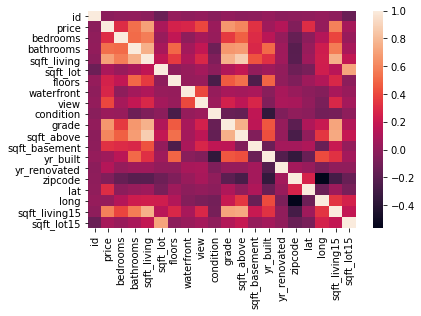

In [126]:
corr = df.corr()
sns.heatmap(corr);

In [127]:
df.corr()['price'].sort_values(ascending=False)

price            1.000000
sqft_living      0.701917
grade            0.667951
sqft_above       0.605368
sqft_living15    0.585241
bathrooms        0.525906
view             0.395734
sqft_basement    0.325008
bedrooms         0.308787
lat              0.306692
waterfront       0.276295
floors           0.256804
yr_renovated     0.129599
sqft_lot         0.089876
sqft_lot15       0.082845
yr_built         0.053953
condition        0.036056
long             0.022036
id              -0.016772
zipcode         -0.053402
Name: price, dtype: float64

### Comparisons with the target variable: Month, Bathrooms, Grade, and Sqft_Living

# Starting Data Analysis

In [128]:
#Question 1: What is the best month to buy a house? 
#Seperating Date to Month
df['date'] = pd.to_datetime(df['date'].str.strip())
df['Month'] = df['date'].dt.month
df['Day'] = df['date'].dt.day

In [129]:
#isolating Month and Price
df_mp = df[['Month', 'price']]
df_mp

,Month,price
0,10,221900.0
1,12,538000.0
2,2,180000.0
3,12,604000.0
4,2,510000.0
...,...,...
21592,5,360000.0
21593,2,400000.0
21594,6,402101.0
21595,1,400000.0


In [130]:
#Bootstrapping to find the range of house prices in certain months.
def bootstrap_categories(df, category, target, sample_count=200):
    unique=df[category].unique()
    
    for val in unique:
        samples=[]
        for i in range(sample_count):
            frame=df[df[category]==val]
            sample=np.random.choice(frame[target],size=frame.shape[0],replace=True)
            samples.append(sample.mean())
        plt.hist(samples, label=val,alpha=.7)
    plt.legend()

In [131]:
#Looking for duplicates that might interfere with data
df_mp = df_mp.drop_duplicates()
df_mp

,Month,price
0,10,221900.0
1,12,538000.0
2,2,180000.0
3,12,604000.0
4,2,510000.0
...,...,...
21582,10,541800.0
21584,10,1540000.0
21587,8,507250.0
21589,10,610685.0


In [132]:
#Look for difference in types to make sure it doesn't interfere with visualization.
df_mp.info()
df_mp['price'].astype('int64')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10134 entries, 0 to 21594
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Month   10134 non-null  int64  
 1   price   10134 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 237.5 KB


0         221900
1         538000
2         180000
3         604000
4         510000
          ...   
21582     541800
21584    1540000
21587     507250
21589     610685
21594     402101
Name: price, Length: 10134, dtype: int64

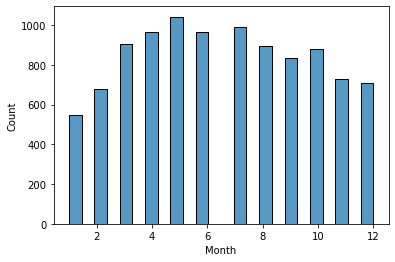

In [133]:
#Using histogram, we can find out when the most houses are sold.
sns.histplot(data=df_mp, x="Month");

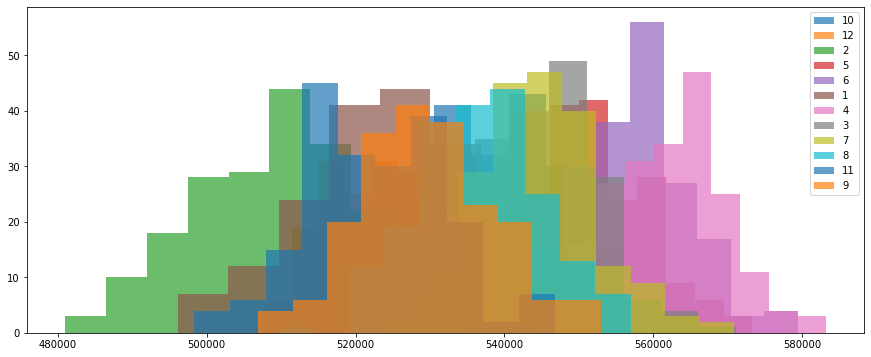

In [134]:
plt.figure(figsize=(15,6))
bootstrap_categories(df, 'Month', 'price')

C:\Users\letru\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<Figure size 1080x720 with 0 Axes>

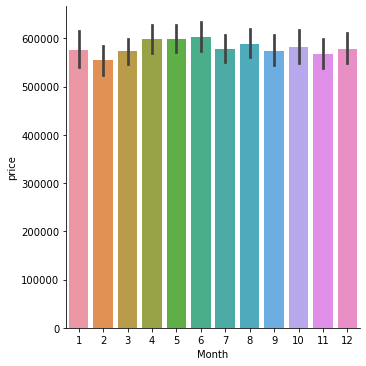

In [17]:
plt.figure(figsize=(15,10))
sns.catplot('Month', 'price', data=df_mp, kind='bar');

In [137]:
#Finding average cost of houses based on the month. 
df_mp1 = df_mp.groupby('Month')['price'].mean()
df_mp1

Month
1     576665.591985
2     554967.214180
3     574399.066372
4     599240.896480
5     599022.686180
6     602711.514523
7     578677.720202
8     588485.286830
9     574327.256903
10    581666.594318
11    568592.302613
12    578912.331445
Name: price, dtype: float64

### Observations:
- February shows the cheapest prices 
    - Post holidays, marketers and real estate agents want to start their year off strong.
- June shows the most expensive prices on average.
- However, based on the data shown above... on average, more houses are sold in April and May
    - Spring time means more showings, more showings means more home purchases
    - Mean price in June = 602k, where as mean in February is 554k. 10% premium.
        - Average house price in April and May are about 599k. Statistically not significant buying anywhere between April and June.
    

# Bathroom, Price, Grade, and Sqft_Living

In [138]:
price = df[['bathrooms', 'price', 'grade', 'sqft_living']]
price = price.set_index('price').reset_index()
price

,price,bathrooms,grade,sqft_living
0,221900.0,1.00,7,1180
1,538000.0,2.25,7,2570
2,180000.0,1.00,6,770
3,604000.0,3.00,7,1960
4,510000.0,2.00,8,1680
...,...,...,...,...
21592,360000.0,2.50,8,1530
21593,400000.0,2.50,8,2310
21594,402101.0,0.75,7,1020
21595,400000.0,2.50,8,1600


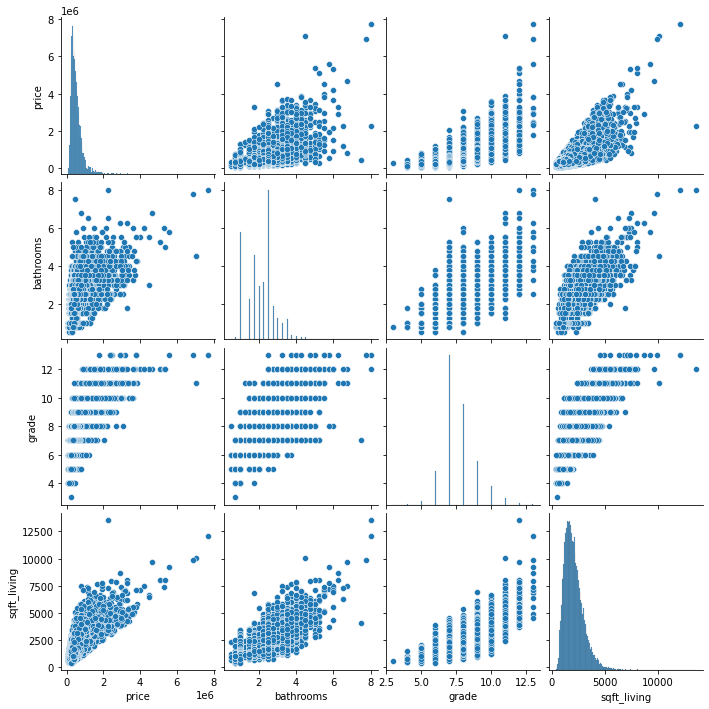

In [139]:
sns.pairplot(price)

**Looking at bathrooms**

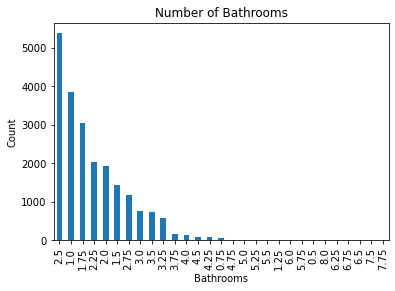

In [141]:
df['bathrooms'].value_counts().plot(kind='bar')
plt.title('Number of Bathrooms')
plt.xlabel('Bathrooms')
plt.ylabel('Count')
sns.despine;

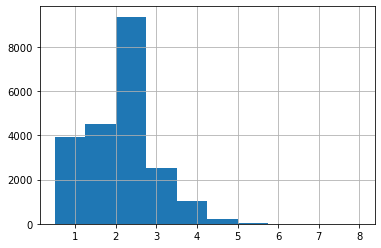

In [142]:
price['bathrooms'].hist();

In [ ]:
sns.boxplot['bathrooms']

- Most houses sold have 1 and 2.5 bathrooms. 
- Kind of a normal distribution; mean is 2.11 bathrooms; outliers after 4.

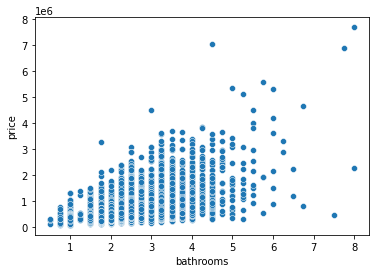

In [143]:
sns.scatterplot(data=price, x="bathrooms", y="price");

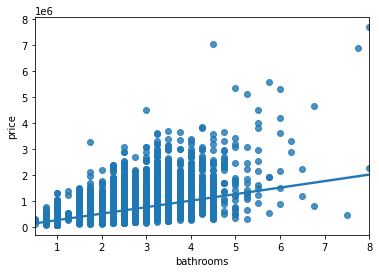

In [144]:
sns.regplot(x="bathrooms", y="price", data=price);

In [145]:
fsm_bathroom = price[['price', 'bathrooms']].copy()

In [146]:
fsm = ols(formula='price~bathrooms', data=fsm_bathroom)
fsm_br_results = fsm.fit()
fsm_br_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.277
Model:                            OLS   Adj. R-squared:                  0.277
Method:                 Least Squares   F-statistic:                     8256.
Date:                Wed, 28 Apr 2021   Prob (F-statistic):               0.00
Time:                        13:15:20   Log-Likelihood:            -3.0389e+05
No. Observations:               21597   AIC:                         6.078e+05
Df Residuals:                   21595   BIC:                         6.078e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   8712.6518   6224.769      1.400      0.162   -3488.356    2.09e+04
bathrooms   2.512e+05   2765.054     90.863      0.000    2.46e+05    2.57e+05
==============================================================================
Omnibus:                    17251.570   Durbin-Watson:                   1.960
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           882735.889
Skew:                           3.452   Prob(JB):                         0.00
Kurtosis:                      33.550   Cond. No.                         7.76
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

- 28% chance of variance in our model. This makes sense as most houses don't have varying amounts of bathrooms in them.
- for every "house" without bathroom that has bathroom set to 0, cost on average ~8.7k. with increase of 1 bathroom, we would expect 251000 dollars increase on average
- This model finds intercept to be statistically non-significant

### Bathroom Model Evaluation

In [147]:
#linearity
rainbow_statistic, rainbow_p_value = linear_rainbow(fsm_br_results)
print('Rainbow_statistic: ', rainbow_statistic)
print('Rainbow p_value: ', rainbow_p_value)

Rainbow_statistic:  1.0715151830106642
Rainbow p_value:  0.00016641214379916486


P_value is 1.0e-4, much less than .5. We reject null hypothesis of this being linear.

Based on the JB value of 0.0 < .5, we fail to reject the null hypothesis of this being normally distributed. JB value is large.


In [148]:
#homoscedascity 
y = fsm_bathroom['price']
y_hat_br = fsm_br_results.predict()

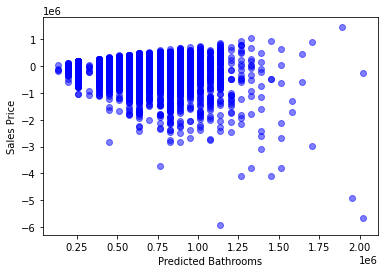

In [149]:
fig2, ax2 = plt.subplots()
ax2.set(xlabel="Predicted Bathrooms",
        ylabel="Sales Price")
ax2.scatter(x=y_hat_br, y=y_hat_br-y, color="blue", alpha=0.5);

Model has a weird cone shape; expecting most homes, on average, one bathroom. To double check work, we will test with the BP Test.

In [150]:
lm, lm_p_value, fvalue, f_p_value = het_breuschpagan(y-y_hat_br, fsm_bathroom[["price"]])
print("Lagrange Multiplier p-value:", lm_p_value)
print("F-statistic p-value:", f_p_value)

Lagrange Multiplier p-value: nan
F-statistic p-value: 0.0


Low P_Value means we reject the null hypothesis because this model violates the homoscedasticity assumption.

## Adding on another feature.
**Looking at grade of houses**

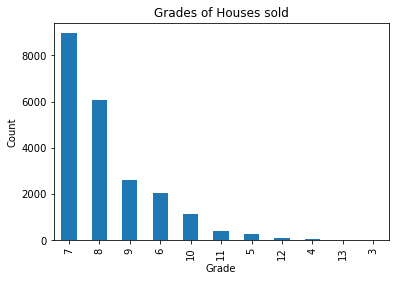

In [151]:
df['grade'].value_counts().plot(kind='bar')
plt.title('Grades of Houses sold')
plt.xlabel('Grade')
plt.ylabel('Count')
sns.despine;

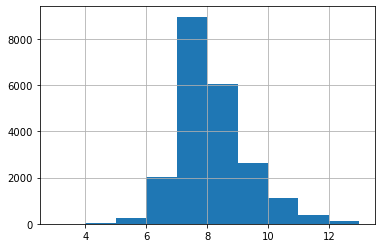

In [152]:
price['grade'].hist();

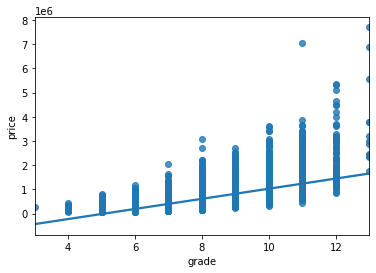

In [153]:
sns.regplot(x="grade", y="price", data=price);

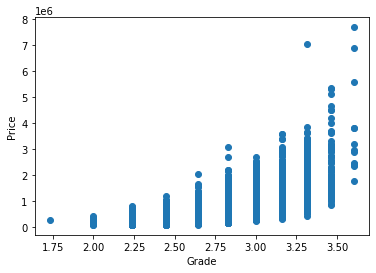

In [154]:
fig3, ax3 = plt.subplots()

ax3.set(xlabel="Grade", ylabel="Price")
ax3.scatter(x=np.sqrt(model_df["grade"]), y=model_df["price"]);

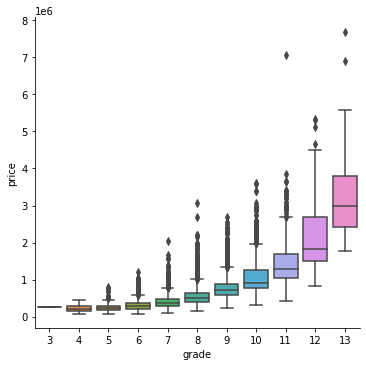

In [155]:
sns.catplot(x='grade', y='price', data=price, kind='box');

In [156]:
np.corrcoef(df.grade, df.price)[0][1]

0.6679507713876449

In [157]:
df.groupby('grade')['price'].mean().astype('int64')

grade
3      262000
4      212001
5      248523
6      301916
7      402594
8      542986
9      773738
10    1072347
11    1497792
12    2202528
13    3710769
Name: price, dtype: int64

In [158]:
fsm_grade = price[['price', 'grade', 'bathrooms']].copy()

In [159]:
fsm_g = ols(formula='price~grade + bathrooms', data=price)
fsm_g_results = fsm_g.fit()
fsm_g_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.458
Model:                            OLS   Adj. R-squared:                  0.458
Method:                 Least Squares   F-statistic:                     9123.
Date:                Wed, 28 Apr 2021   Prob (F-statistic):               0.00
Time:                        13:15:54   Log-Likelihood:            -3.0078e+05
No. Observations:               21597   AIC:                         6.016e+05
Df Residuals:                   21594   BIC:                         6.016e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -9.76e+05   1.28e+04    -76.401      0.000      -1e+06   -9.51e+05
grade       1.788e+05   2102.671     85.016      0.000    1.75e+05    1.83e+05
bathrooms   6.965e+04   3207.937     21.712      0.000    6.34e+04    7.59e+04
==============================================================================
Omnibus:                    19382.913   Durbin-Watson:                   1.959
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1800084.117
Skew:                           3.944   Prob(JB):                         0.00
Kurtosis:                      47.024   Cond. No.                         57.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Observations:

- Most houses sold are between grades 6 and 10, on a sale of 1 - 13.
- Price increases as grade increases.
    * For some reason, houses grades 4 and 5 are cheaper than grades 3. 
- Distrubtion is almost normally distributed. 
- Based on linear regression visualization, slight positive correlation. 
    * Because grades are "subjective", it is difficult to establish a linear relationship. This might be an ordinal relationship.

In [160]:
pd.get_dummies(df, columns=['grade'], drop_first=True).columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'Month', 'Day', 'grade_4', 'grade_5',
       'grade_6', 'grade_7', 'grade_8', 'grade_9', 'grade_10', 'grade_11',
       'grade_12', 'grade_13'],
      dtype='object')

In [105]:
def create_formula(df, target='price'):
    columns = df.columns.to_list()
    columns.remove(target)
    formula = target+"~"+"+".join(columns)
    return formula

In [99]:
create_formula(df, 'price')

'price~id+date+bedrooms+bathrooms+sqft_living+sqft_lot+floors+waterfront+view+condition+grade+sqft_above+sqft_basement+yr_built+yr_renovated+zipcode+lat+long+sqft_living15+sqft_lot15+Month+Day'

**Create Model df**

In [100]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15', 'Month', 'Day'],
      dtype='object')

In [103]:
model_df = df[['bedrooms', 'bathrooms', 'sqft_living','grade', 'price']]

**Create formula**

In [106]:
formula = create_formula(model_df)

**Run Model**

In [108]:
model = ols(formula, model_df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.544
Model:                            OLS   Adj. R-squared:                  0.544
Method:                 Least Squares   F-statistic:                     6429.
Date:                Wed, 28 Apr 2021   Prob (F-statistic):               0.00
Time:                        11:23:15   Log-Likelihood:            -2.9892e+05
No. Observations:               21597   AIC:                         5.979e+05
Df Residuals:                   21592   BIC:                         5.979e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -4.813e+05    1.5e+04    -32.145      0.000   -5.11e+05   -4.52e+05
bedrooms    -3.965e+04   2304.000    -17.210      0.000   -4.42e+04   -3.51e+04
bathrooms   -2.722e+04   3491.838     -7.794      0.000   -3.41e+04   -2.04e+04
sqft_living   226.9304      3.592     63.177      0.000     219.890     233.971
grade        9.674e+04   2323.206     41.640      0.000    9.22e+04    1.01e+05
==============================================================================
Omnibus:                    16463.655   Durbin-Watson:                   1.981
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           894495.760
Skew:                           3.179   Prob(JB):                         0.00
Kurtosis:                      33.880   Cond. No.                     2.04e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.04e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Grade Model Evaluation
### Run categorical evaluation. 

In [57]:
#linear
rainbow_statistic, rainbow_p_value = linear_rainbow(fsm_g_results)
print('Rainbow_statistic: ', rainbow_statistic)
print('Rainbow p_value: ', rainbow_p_value)

Rainbow_statistic:  1.0853926458042982
Rainbow p_value:  1.038149154564046e-05


JB value has gotten worse. The Prob(JB) value of 0.0 shows that we see the data is normally distributed as shown in the histogram shown above.

In [58]:
#homo
y2 = fsm_grade["price"]
y_hat_2 = fsm_g_results.predict()

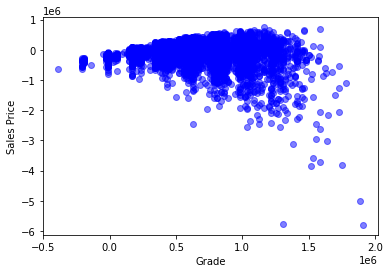

In [59]:
fig2, ax2 = plt.subplots()
ax2.set(xlabel="Grade",
        ylabel="Sales Price")
ax2.scatter(x=y_hat_2, y=y_hat_2-y2, color="blue", alpha=0.5);

In [71]:
lm, lm_p_value, fvalue, f_p_value = het_breuschpagan(y2-y_hat_2, fsm_grade[["grade", "bathrooms"]])
print("Lagrange Multiplier p-value:", lm_p_value)
print("F-statistic p-value:", f_p_value)

Lagrange Multiplier p-value: 1.025563607165879e-229
F-statistic p-value: 8.787293930290028e-234


The null hypothesis is homoscedasticity, alternative hypothesis is heteroscedasticity. Thus returning a low p-value means that the current model violates the homoscedasticity assumption

In [72]:
#independence
rows = fsm_grade[["grade", "bathrooms"]].values

vif_df = pd.DataFrame()
vif_df["VIF"] = [variance_inflation_factor(rows, i) for i in range(2)]
vif_df["feature"] = ["grade", "bathrooms"]

vif_df

,VIF,feature
0,13.936816,grade
1,13.936816,bathrooms


Anything above 5 violates the independence assumption.

### Sqft of Living Space

<AxesSubplot:>

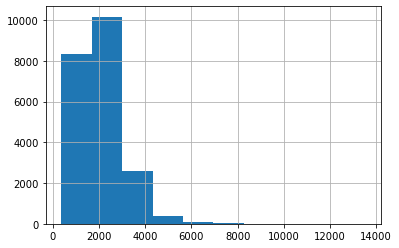

In [42]:
price['sqft_living'].hist()

Text(0.5, 1.0, 'Price vs Sqft')

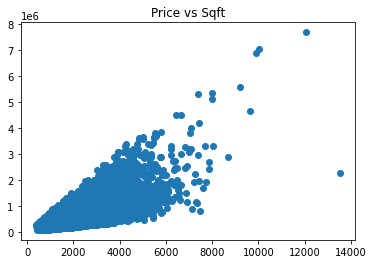

In [43]:
plt.scatter(price.sqft_living, price.price)
plt.title('Price vs Sqft')

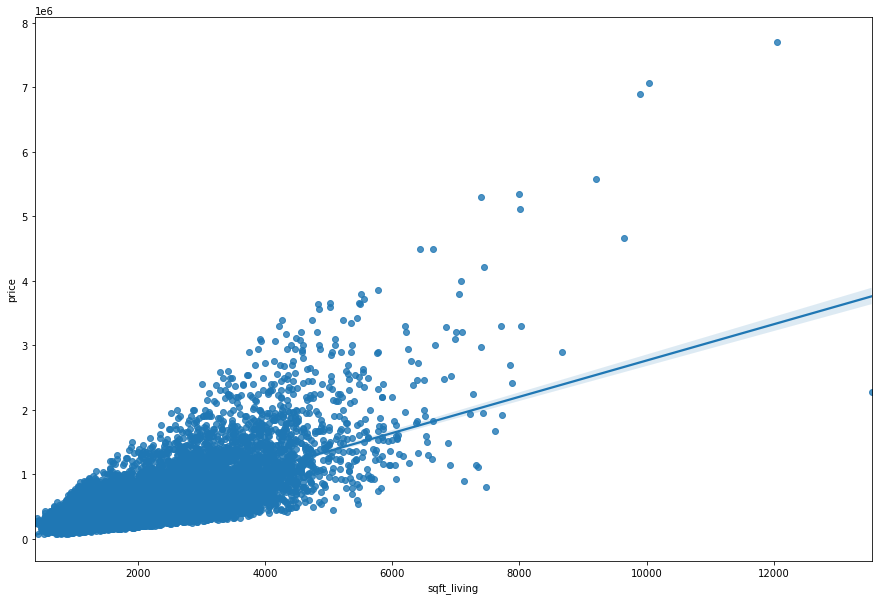

In [44]:
plt.figure(figsize=(15,10))
sns.regplot(x="sqft_living", y="price", data=price);

In [64]:
fsm_living = price[['price', 'sqft_living', 'bathrooms', 'grade']].copy()
fsm_live = ols(formula='price~sqft_living + bathrooms + grade', data=price)
fsm_live_results = fsm_live.fit()
fsm_live_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.537
Model:                            OLS   Adj. R-squared:                  0.537
Method:                 Least Squares   F-statistic:                     8359.
Date:                Wed, 28 Apr 2021   Prob (F-statistic):               0.00
Time:                        09:47:10   Log-Likelihood:            -2.9907e+05
No. Observations:               21597   AIC:                         5.981e+05
Df Residuals:                   21593   BIC:                         5.982e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -6.024e+05   1.33e+04    -45.279      0.000   -6.28e+05   -5.76e+05
sqft_living   203.1650      3.339     60.855      0.000     196.621     209.709
bathrooms   -3.836e+04   3454.677    -11.103      0.000   -4.51e+04   -3.16e+04
grade        1.046e+05   2293.086     45.626      0.000       1e+05    1.09e+05
==============================================================================
Omnibus:                    16926.041   Durbin-Watson:                   1.980
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1008526.554
Skew:                           3.291   Prob(JB):                         0.00
Kurtosis:                      35.824   Cond. No.                     1.80e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.8e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [67]:
#linerar
rainbow_statistic, rainbow_p_value = linear_rainbow(fsm_live_results)
print("Rainbow statistic:", rainbow_statistic)
print("Rainbow p-value:", rainbow_p_value)

Rainbow statistic: 1.0779614192874447
Rainbow p-value: 4.816672288239962e-05


JB values have gotten so, so much worse... we can infer the normality assumption has been violated.

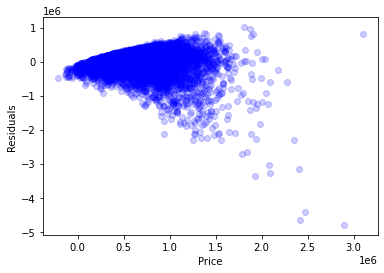

In [70]:
#homo
y3 = fsm_living["price"]
y_hat_3 = fsm_live_results.predict()
fig4, ax4 = plt.subplots()
ax4.set(xlabel="Price",
        ylabel="Residuals")
ax4.scatter(x=y_hat_3, y=y_hat_3-y3, color="blue", alpha=0.2);

In [ ]:
lm, lm_p_value, fvalue, f_p_value = het_breuschpagan(y-y_hat, fsm_living[["Schooling", "Adult_Mortality"]])
print("Lagrange Multiplier p-value:", lm_p_value)
print("F-statistic p-value:", f_p_value)

## Removing Dummies 

In [161]:
pd.get_dummies(df, columns=['grade'], drop_first=True).columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'Month', 'Day', 'grade_4', 'grade_5',
       'grade_6', 'grade_7', 'grade_8', 'grade_9', 'grade_10', 'grade_11',
       'grade_12', 'grade_13'],
      dtype='object')

In [162]:
def create_formula(df, target='price'):
    columns = df.columns.to_list()
    columns.remove(target)
    formula = target+"~"+"+".join(columns)
    return formula

In [163]:
create_formula(df, 'price')

'price~id+date+bedrooms+bathrooms+sqft_living+sqft_lot+floors+waterfront+view+condition+grade+sqft_above+sqft_basement+yr_built+yr_renovated+zipcode+lat+long+sqft_living15+sqft_lot15+Month+Day'

**Creating Model DF**

In [164]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15', 'Month', 'Day'],
      dtype='object')

In [167]:
model_df = df[['bedrooms', 'bathrooms', 'sqft_living','grade', 'price']]

**Creating Formulua**

In [168]:
formula = create_formula(model_df)

**Run Model**

In [169]:
model = ols(formula, model_df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.544
Model:                            OLS   Adj. R-squared:                  0.544
Method:                 Least Squares   F-statistic:                     6429.
Date:                Wed, 28 Apr 2021   Prob (F-statistic):               0.00
Time:                        13:18:55   Log-Likelihood:            -2.9892e+05
No. Observations:               21597   AIC:                         5.979e+05
Df Residuals:                   21592   BIC:                         5.979e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -4.813e+05    1.5e+04    -32.145      0.000   -5.11e+05   -4.52e+05
bedrooms    -3.965e+04   2304.000    -17.210      0.000   -4.42e+04   -3.51e+04
bathrooms   -2.722e+04   3491.838     -7.794      0.000   -3.41e+04   -2.04e+04
sqft_living   226.9304      3.592     63.177      0.000     219.890     233.971
grade        9.674e+04   2323.206     41.640      0.000    9.22e+04    1.01e+05
==============================================================================
Omnibus:                    16463.655   Durbin-Watson:                   1.981
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           894495.760
Skew:                           3.179   Prob(JB):                         0.00
Kurtosis:                      33.880   Cond. No.                     2.04e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.04e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**Model DF Testing**

In [171]:
rainbow_statistic, rainbow_p_value = linear_rainbow(model)
print('Rainbow_statistic: ', rainbow_statistic)
print('Rainbow p_value: ', rainbow_p_value)

Rainbow_statistic:  1.0719792111167725
Rainbow p_value:  0.0001527782424895508


JB value is still very high, violating normality assumption

In [173]:
y_model = model_df["price"]
y_hat_model = model.predict()

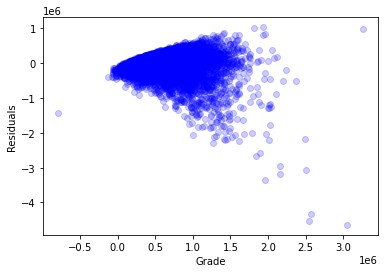

In [174]:
fig5, ax5 = plt.subplots()
ax5.set(xlabel="Grade",
        ylabel="Residuals")
ax5.scatter(x=y_hat_model, y=y_hat_model-y_model, color="blue", alpha=0.2);

## Bootstrapping categoricals

Boot strapping is sampling technique

**How it works**
1. Loop over a set number
2. Randomly sample from data with replacement. The sample size is equal to the size of the data we are sampling from.
3. Append the mean of the sample from step two to a list.